In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('./data/covertype.csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

In [5]:
x = df[df.columns[:54]]

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

In [7]:
y = df['class']

In [10]:
y.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 90)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',
                         input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense (8, activation = 'softmax')
])
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history1 = model.fit(x_train, y_train,
                    epochs = 26, batch_size = 60,
                    validation_data = (x_test, y_test))

Epoch 1/26
6779/6779 [==============================] - 8s 1ms/step - loss: 0.6444 - accuracy: 0.7245 - val_loss: 0.5774 - val_accuracy: 0.7505
Epoch 2/26
6779/6779 [==============================] - 7s 1ms/step - loss: 0.5501 - accuracy: 0.7618 - val_loss: 0.5270 - val_accuracy: 0.7712
Epoch 3/26
6779/6779 [==============================] - 7s 1ms/step - loss: 0.5091 - accuracy: 0.7786 - val_loss: 0.4999 - val_accuracy: 0.7800
Epoch 4/26
6779/6779 [==============================] - 7s 1ms/step - loss: 0.4836 - accuracy: 0.7908 - val_loss: 0.4658 - val_accuracy: 0.8001
Epoch 5/26
6779/6779 [==============================] - 7s 1ms/step - loss: 0.4651 - accuracy: 0.8010 - val_loss: 0.4582 - val_accuracy: 0.8046
Epoch 6/26
6779/6779 [==============================] - 7s 1ms/step - loss: 0.4497 - accuracy: 0.8092 - val_loss: 0.4508 - val_accuracy: 0.8060
Epoch 7/26
6779/6779 [==============================] - 7s 1ms/step - loss: 0.4371 - accuracy: 0.8149 - val_loss: 0.4330 - val_accuracy:

In [38]:
import matplotlib.pylab as plt

In [42]:
acc = history1.history['accuracy']
loss= history1.history['loss']
val_acc = history1.history['val_accuracy']
val_loss = history1.history['val_loss']

In [43]:
epochs = range(len(acc))

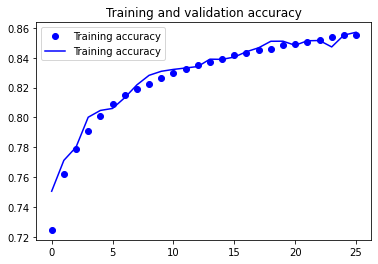

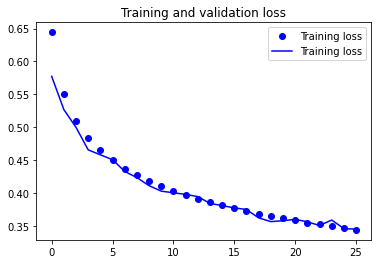

In [44]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 표준화

In [56]:
from sklearn import preprocessing
df = pd.read_csv('./data/covertype.csv')
x = df[df.columns[:55]]
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
train_norm = x_train[x_train.columns[0:10]]
test_norm = x_test[x_test.columns[0:10]]
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns)
x_train.update(training_norm_col)
print (x_train.head())
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns)
x_test.update(testing_norm_col)
print (x_test.head())

        Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
152044   0.222367 -0.228639 -0.412501                          0.148488   
363373   1.980491 -0.469989  0.255450                          3.018825   
372733  -1.081930  0.271940  0.389046                         -0.867893   
572846  -1.164121 -0.157129 -0.278914                         -1.267860   
114145  -0.052784  0.861906  0.255450                         -0.279712   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
152044                        0.149100                         1.336117   
363373                        4.443370                         0.168073   
372733                       -0.160091                        -0.241801   
572846                       -0.795648                        -0.461171   
114145                       -0.125736                         1.811418   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
152044       1.002686        0.539776     

In [52]:
history2 = model.fit(x_train, y_train,
                    epochs = 26, batch_size = 60,
                    validation_data = (x_test, y_test))

Epoch 1/26
6779/6779 [==============================] - 6s 930us/step - loss: 0.9164 - accuracy: 0.7571 - val_loss: 0.5715 - val_accuracy: 0.7811
Epoch 2/26
6779/6779 [==============================] - 6s 925us/step - loss: 0.4651 - accuracy: 0.8149 - val_loss: 0.4271 - val_accuracy: 0.8264
Epoch 3/26
6779/6779 [==============================] - 6s 932us/step - loss: 0.4058 - accuracy: 0.8344 - val_loss: 0.4015 - val_accuracy: 0.8339
Epoch 4/26
6779/6779 [==============================] - 6s 917us/step - loss: 0.3784 - accuracy: 0.8445 - val_loss: 0.3633 - val_accuracy: 0.8525
Epoch 5/26
6779/6779 [==============================] - 6s 908us/step - loss: 0.3623 - accuracy: 0.8516 - val_loss: 0.3596 - val_accuracy: 0.8536
Epoch 6/26
6779/6779 [==============================] - 6s 915us/step - loss: 0.3505 - accuracy: 0.8569 - val_loss: 0.3432 - val_accuracy: 0.8588
Epoch 7/26
6779/6779 [==============================] - 7s 969us/step - loss: 0.3412 - accuracy: 0.8602 - val_loss: 0.3376 -

In [57]:
acc = history2.history['accuracy']
loss= history2.history['loss']
val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']

In [58]:
epochs = range(len(acc))

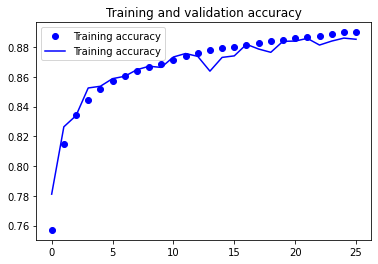

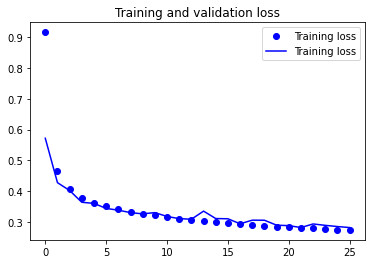

In [59]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()